In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
# 8x8 digits

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

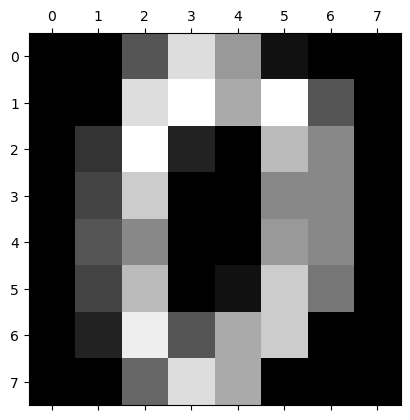

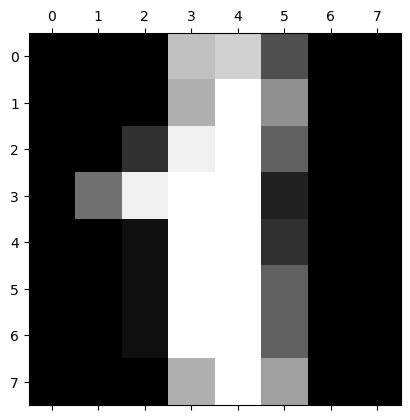

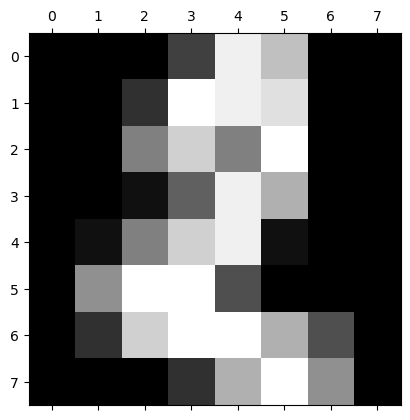

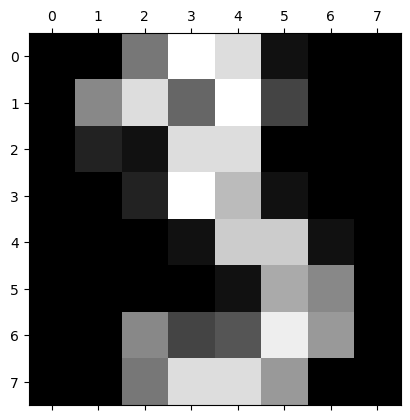

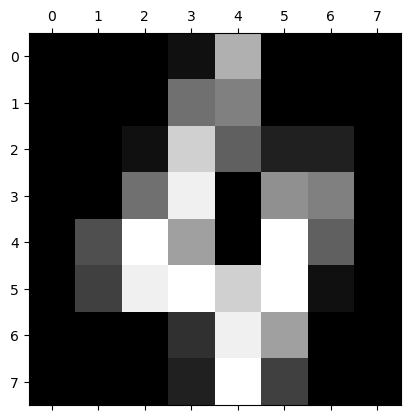

In [8]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [4]:
digits.target[0:5]
# shows the target variable (for supervised learning)

array([0, 1, 2, 3, 4])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(digits.data , digits.target , test_size=0.2)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\piku\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
model.score(X_test,y_test)

0.9694444444444444

<Figure size 640x480 with 0 Axes>

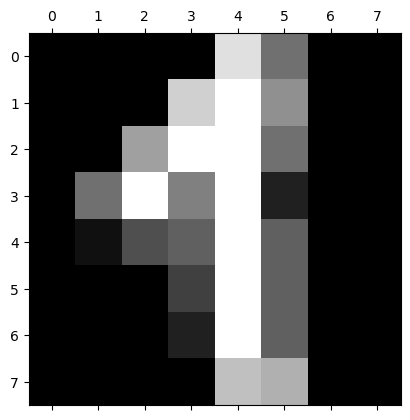

In [11]:
plt.gray()
plt.matshow(digits.images[70])

In [20]:
digits.target[70]

1

In [21]:
model.predict([digits.data[70]])

array([1])

#### Therefore the model is doing pretty well !!

# Making confusion matrix to see where my model is wrong

In [12]:
y_predicted = model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
cm = confusion_matrix(y_test,y_predicted)
# we pass in Truth , Prediction

In [15]:
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 34,  1,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 24,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 37]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

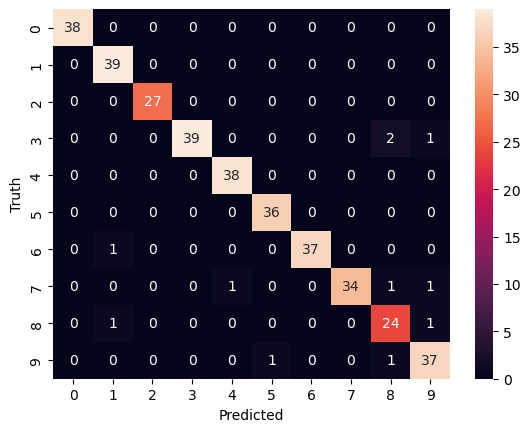

In [17]:
import seaborn as sns
# plt.figure(figsize=(10,7))
sns.heatmap(cm , annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using IRIS Dataset from sklearn

In [32]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

In [33]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [35]:
# Create a DataFrame from iris.data (features) and iris.target (target labels)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Add target variable as a separate column
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Therefore there are no NULL entries in the table

### Lets check the variation of species with sepal length (cm)

<Axes: xlabel='sepal length (cm)'>

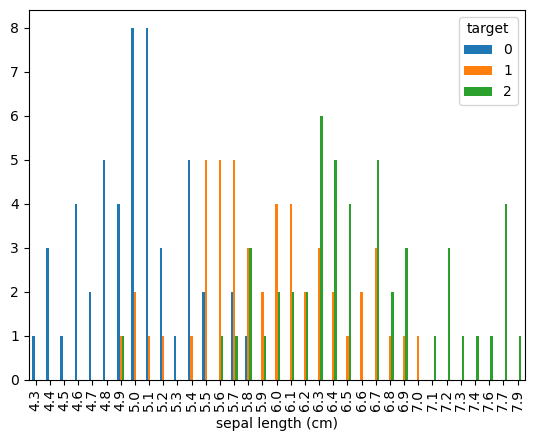

In [41]:
pd.crosstab(df['sepal length (cm)'],df.target).plot(kind='bar')

In [47]:
temp = df.groupby('target')
temp.mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [48]:
temp.median()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.0,3.4,1.50,0.2
1,5.9,2.8,4.35,1.3
2,6.5,3.0,5.55,2.0


In [52]:
print(df[df.target == 0].shape[0])
print(df[df.target == 1].shape[0])
print(df[df.target == 2].shape[0])

50
50
50


### Therefore our data is not imbalanced. Now making our Logistic regression model

In [54]:
from sklearn.linear_model import LogisticRegression
myModel = LogisticRegression()

In [65]:
X = df.drop(['target'],axis=1)
y = df['target']

In [70]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [71]:
myModel.fit(X_train,y_train)

LogisticRegression()

In [72]:
myModel.score(X_test,y_test)

0.9333333333333333

In [73]:
predicted_values = myModel.predict(X_test)

## Making confusion matrix , evaluating the parameters for my model

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_values)

Text(50.722222222222214, 0.5, 'Truth')

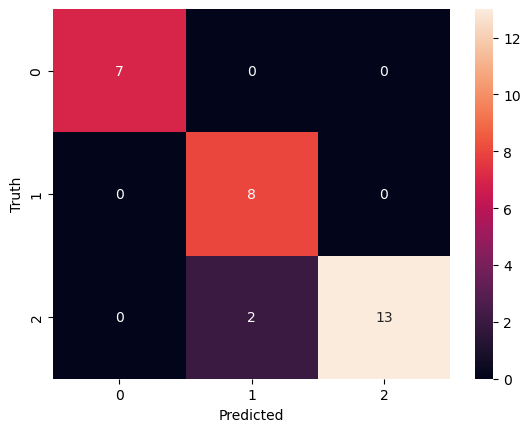

In [78]:
%matplotlib inline
import seaborn as sns
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
from sklearn.metrics import classification_report
report = classification_report(y_test,predicted_values)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.80      1.00      0.89         8
           2       1.00      0.87      0.93        15

    accuracy                           0.93        30
   macro avg       0.93      0.96      0.94        30
weighted avg       0.95      0.93      0.93        30



Support: The number of true instances for each class in the test data.

Precision: Ratio of true positives to predicted positives for each class.

Recall: Ratio of true positives to actual positives for each class.

F1-score: Harmonic mean of precision and recall for each class.

Accuracy: Overall accuracy of the model (might be present at the bottom).
